# Парная линейная регрессия
## Цель работы

Познакомиться с основными понятиями задачи регрессии и метода градиентного спуска.

Содержание работы

1- Загрузить данные из тектовых файлов.

2- Создать и построить модель парной линейной регрессии с использованием метода градиентного спуска.

3- Оценить на графике качество построенной модели.

4- Построить кривые обучения.

In [1]:

# Для полноценной работы с регрессионным анализом данных на потребуются следующие библиотеки языка Python:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Для начала считаем данные о котировке двух инструментов из csv-файла:

In [2]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv')

x.to_csv('x.csv')
x.to_csv('y.csv')

Посмотрим формат файла с данными - состав и названия полей:

In [3]:
x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


Аналогичная картина наблюдается и в переменной y. Здесь мы видим две проблемы. Во-первых, при считывании данных из файла pandas добавил специальный стоблец с номером строки. Он нам не нужен. Во-вторых, мы получили объекты типа DataFrame, а для дальнейшей работы нам нужен объект типа Series. Эти проблемы можно решить разными способами, но прощевсего взять из получившихся датафреймов одну нужную колонку:

In [4]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.1_sgd/data/y.csv', index_col=0)['0']

Затем выделим из получившегося объединенного датасета результативный и факторный признак. В нашем случае это будут цены закрытия двух этих инструментов:

In [5]:
x.head()

0    1.462108
1    1.133769
2   -2.301539
3    1.744812
4    0.042214
Name: 0, dtype: float64

Для визуального представления совместного распределения значений используемых переменных построим график зависимости одной переменной от другой:

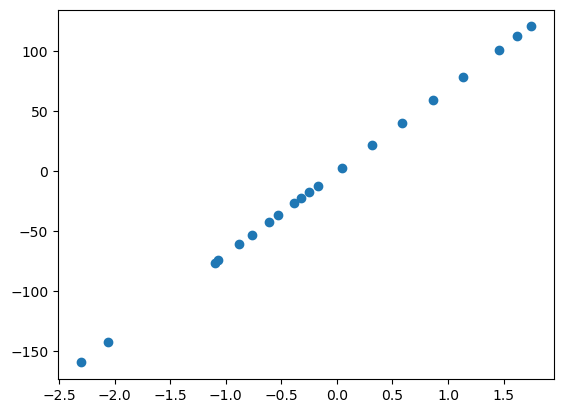

In [6]:
plt.figure()
plt.scatter(x, y)
plt.show()

Мы видим, что линейная зависимость прослеживается в данных. Значит, мы можем продолжать и использовать парную линейную регрессию.

Начнем строить класс, который будет реализовывать метод парной линейной регрессии:

In [7]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

Здесь мы определили конструктор класса, который запоминает в полях экземпляра параметры регрессии. В дальнейшем мы сможем расширять функциональность этого класса сколь угодно много.

Реализуем метод, который принимает значение входной переменной и возвращает теоретическое значение выходной - это прямое действие нашей регрессии - метод предсказания результата по факторам (в случае парной регрессии - по одному фактору):

In [8]:
def predict(self, x):
        return self.b0 + self.b1 * x

Теперь зададим функцию ошибки:

In [9]:
def error(self, X, Y):    
    return sum((self.predict(X) - Y)**2) / (2 * len(X)) 

В данном случае мы используем простую функцию ошибки - среднеквадратическое отклонение (mean squared error, MSE). Можно использовать и другие функции ошибки. Именно вид функции ошибки будет определять то, какой вид регрессии мы реализуем. Существует много разных вариаций простого алгоритма регрессии. О большинстве распространенных методах регрессии можно почитать в официальной документации sklearn.

Теперь реализуем метод градиентного спуска. Он должен принимать массив X и массив Y и обновлять параметры регрессии в соответствии в формулами градиентного спуска:

In [10]:
def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X) # dJ/ d theta_0
        dJ1 = sum((self.predict(X) - Y) * X) /len(X) # dJ/ d theta_1
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

Здесь мы используем некоторое произвольное число - alpha - скорость обучения. О выборе конкретного значения alpha - скорости обучения мы еще поговорим позднее.

Давайте создадим объект регрессии и проверим начальное значение ошибки:

In [34]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, x):
        return self.b0 + self.b1 * x 
    def error(self, X, Y):    
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
    def fit(self, X, Y):  
        alpha = 0.1
        dJ0 = sum(self.predict(X) - Y) /len(X)
        dJ1 = sum((self.predict(X) - Y) * X) /len(X)
        self.b0 -= alpha * dJ0
        self.b1 -= alpha * dJ1

In [35]:
hyp = Model()
print(hyp.predict(0))
print(hyp.predict(100))
J = hyp.error(x, y)
print("initial error:", J)

0
0
initial error: 2937.6446095153406


Как мы видим, для начала оба параметра регрессии равны нулю. Конечно, такая модель не дает надежных предсказаний, но в этом и состоит метод градиентного спуска: начиная с любого решения мы постепенно его улучшаем и приходим к оптимальному решению.

Теперь изобразим нашу регрессию на графике:

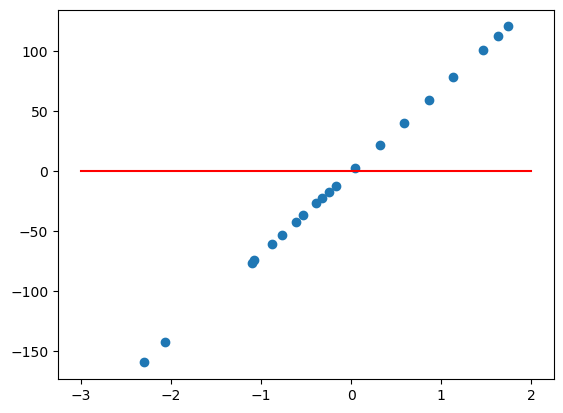

In [36]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Как и ожидалось, мы видим горизонтальную линию - в нашей примитивной модели пока для любого входного значения, выходное всегда будет 0.

Теперь все готово к запуску градиентного спуска.

In [37]:
hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2253.7456808918546


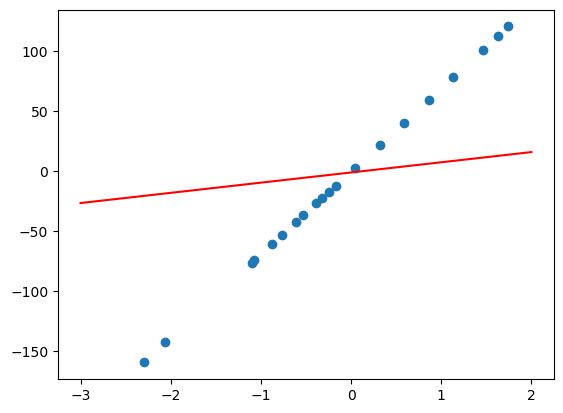

In [38]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Как мы видим, численное значение ошибки значительно уменьшилось. Да и линия на графике существенно приблизилось к точкам. Конечно, наша модель еще далека от совершенства. Мы прошли всего лишь одну итерацию градиентного спуска. Модифицируем метод так, чтобы он запускался в цикле определенное количество раз:

In [21]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0        
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1    
            new_err = hyp.error(X, Y)
            step += 1            
            steps.append(step)
            errors.append(new_err)
        return steps, errors

Заодно мы расширили функциональность этого метода так, чтобы он возвращал массив ошибок на каждой итерации спуска и номер итерации. Это будет нам полезно для построения графика обучения.

Запустим наш градиентный спуск:

In [17]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


Как мы видим, теперь ошибка снизилась гораздо больше. Однако, она все еще не достигла нуля. Заметим, что нулевая ошибка не всегда возможна в принципе из-за того, что точки данных не всегда будут располагаться на одной линии. Кроме того, алгоритм градиентного спуска - численный и сходится в пределе, то есть после бесконечного количества повторений. Нужно стремиться не к нулевой, а к минимально возможной ошибке.

Посмотрим, как теперь наша регрессия выглядит на графике:

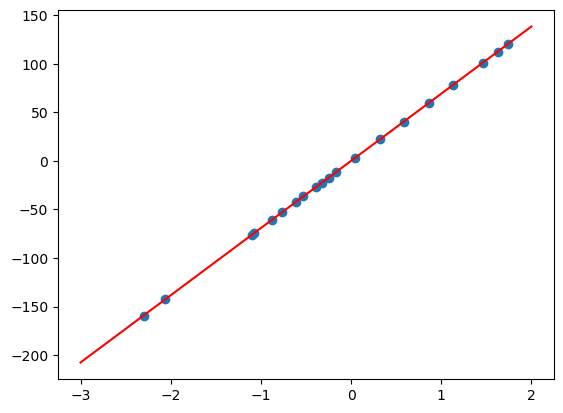

In [22]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

Уже значительно лучше. Линия регрессии довольно похожа на оптимальную. Так ли это на самом деле, глядя на график, сказать сложно, для этого нужно проанализировать, как ошибка регрессии менялась со временем:

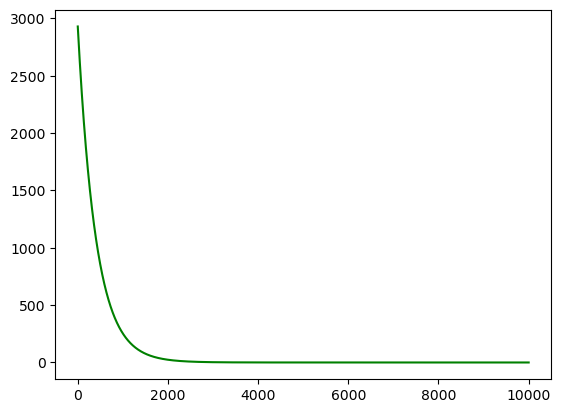

In [19]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

На графике наглядно видно, что в начале обучения ошибка падала быстро, но в ходе градиентного спуска она вышла на плато. Учитывая, что мы используем гладкую функцию ошибки второго порядка, это свидетельствует о том, что мы достигли локального оптимума и дальнейшее повторение алгоритма не принесет улучшения модели.

## Задания для самостоятельного выполнения
1- Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

2- Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

3-Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

4- Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

5- Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

6- Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

7- Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.


## Контрольные вопросы
1- Сформулируйте, в чем состоит задача регрессии, придумайте несколько примеров.

2- Что такое метод градиентного спуска?

3- Что такое скорость обучения в методе градиентного спуска?

4- Какие функции ошибки используются в регрессионных моделях и почему именно такие?

Что показывает конкретное значение ошибки регрессии?

Что показывает график обучения и зачем его строить?


## Дополнительные задания:

1- Изучите официальную документацию библиотеки sklearn. Постройте модель регрессии с использованием библиотечных средств на тех же данных. 

2- Постройте графики и сравните результаты.

3- Почитайте в документации про встроенный метод оценки качества регрессии score. Используйте его для оценки качетсва модели. 

4- Реализуйте такой же расчет в собственном классе модели.

5- (*) Реализуйте нормирование входных значений. Это нужно делать внутри класса модели. Лучше всего - внутри метода обучения. Необходимо привести значения признаков к шкале [0; 1]. Подумайте, как теперь корректно считать теоретические значения.